### Exercice 2: Régression Linéaire multiple
### Objectif : Modéliser la consommation de carburant (mpg) en fonction d'autres variables du dataset:
#### taches:
- charger le dataset MTCars
- Explorer les données
- Visualiser les relations (mpg avec wt/hp/qsec)
- Ajuster un modéle de regression linéaire multiple
- Interpreté les resultat :
> Examinez le résume du modéle pour interpréter les coefficients , la valeur p, et le R carré ajusté
- faire des prédictions
- vérifier les résidus

In [1]:
# tache 1:
df <- mtcars

In [2]:
# tache 2:
head(df)
summary(df)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

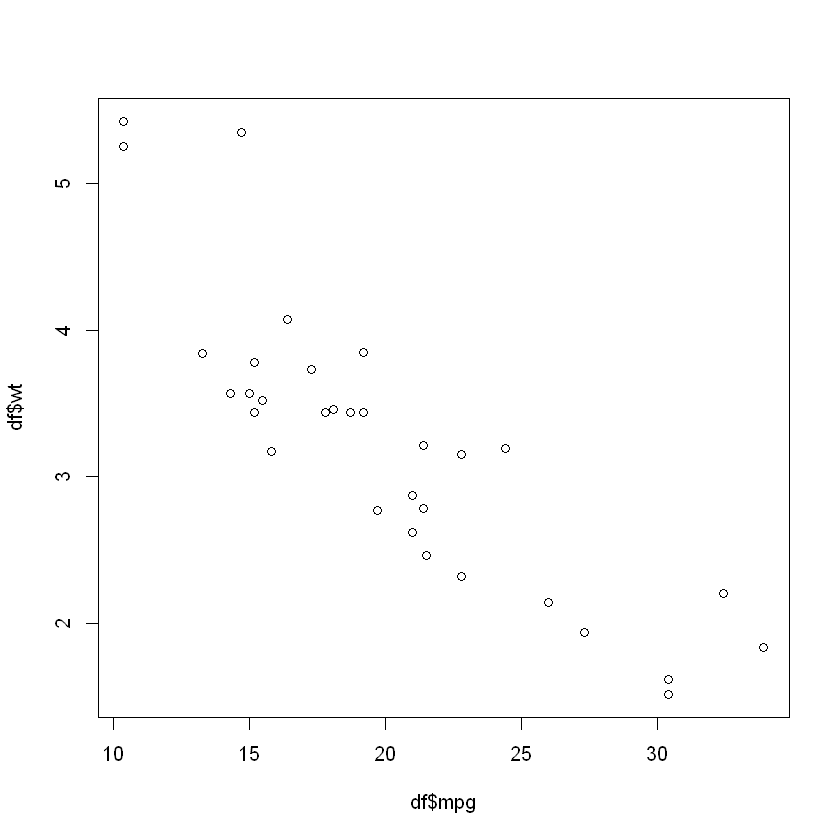

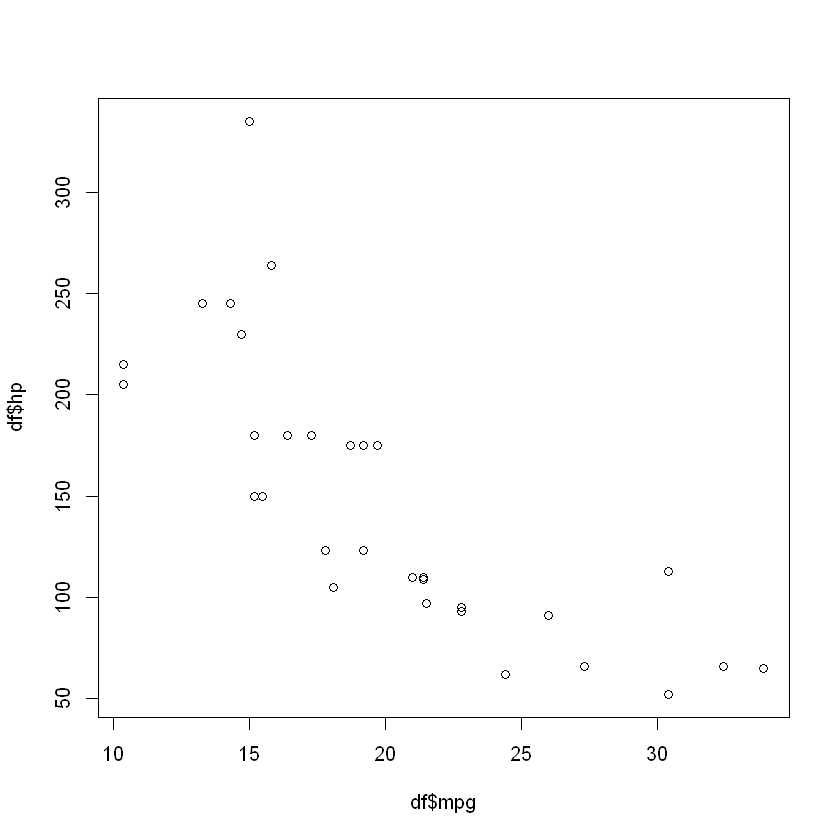

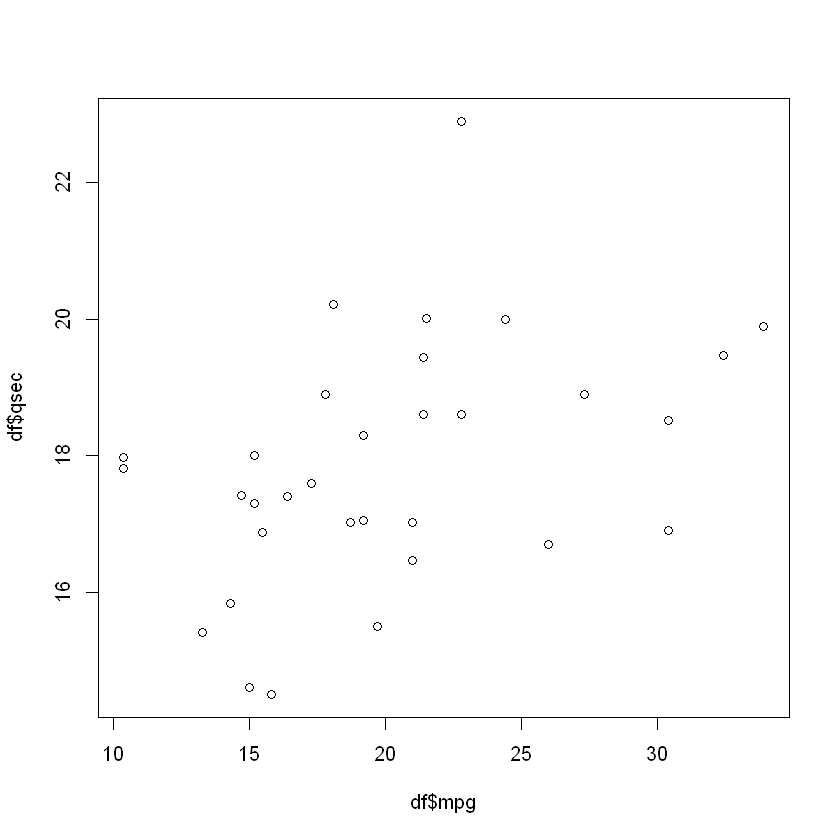

In [13]:
#tache 3:
plot(df$mpg, df$wt)
plot(df$mpg, df$hp)
plot(df$mpg, df$qsec)

In [4]:
# tache 4:
model <- lm(mpg ~ wt + hp + qsec, data=df)
summary(model)


Call:
lm(formula = mpg ~ wt + hp + qsec, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8591 -1.6418 -0.4636  1.1940  5.6092 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 27.61053    8.41993   3.279  0.00278 ** 
wt          -4.35880    0.75270  -5.791 3.22e-06 ***
hp          -0.01782    0.01498  -1.190  0.24418    
qsec         0.51083    0.43922   1.163  0.25463    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.578 on 28 degrees of freedom
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8171 
F-statistic: 47.15 on 3 and 28 DF,  p-value: 4.506e-11


In [5]:
# tache 5:
coef(model)
confint(model)
summary(model)$r.squared
summary(model)$adj.r.squared

(Intercept)          wt          hp        qsec 
27.61052686 -4.35879720 -0.01782227  0.51083369

,2.5 %,97.5 %
(Intercept),10.3630852,44.85796848
wt,-5.9006341,-2.81696034
hp,-0.0485098,0.01286526
qsec,-0.3888708,1.41053822


[1] 0.8347678

[1] 0.8170643

> ce modèle suggère que le poids (wt) a l'impact négatif le plus significatif sur mpg. La puissance (hp) et le temps au quart de mile (qsec) influencent également mpg, mais leurs effets sont moins certains car leurs intervalles de confiance traversent zéro. Le modèle explique environ 83.5% de la variabilité de mpg, ce qui indique une relation forte entre les prédicteurs et le résultat

In [6]:
# tache 6:
new_data <- data.frame(wt = c(2.620, 3.520),hp = c(110, 150),
                       qsec = c(16.46, 17.02))
predictions <- predict(model, newdata = new_data)
predictions

1        2 
22.63835 18.28861

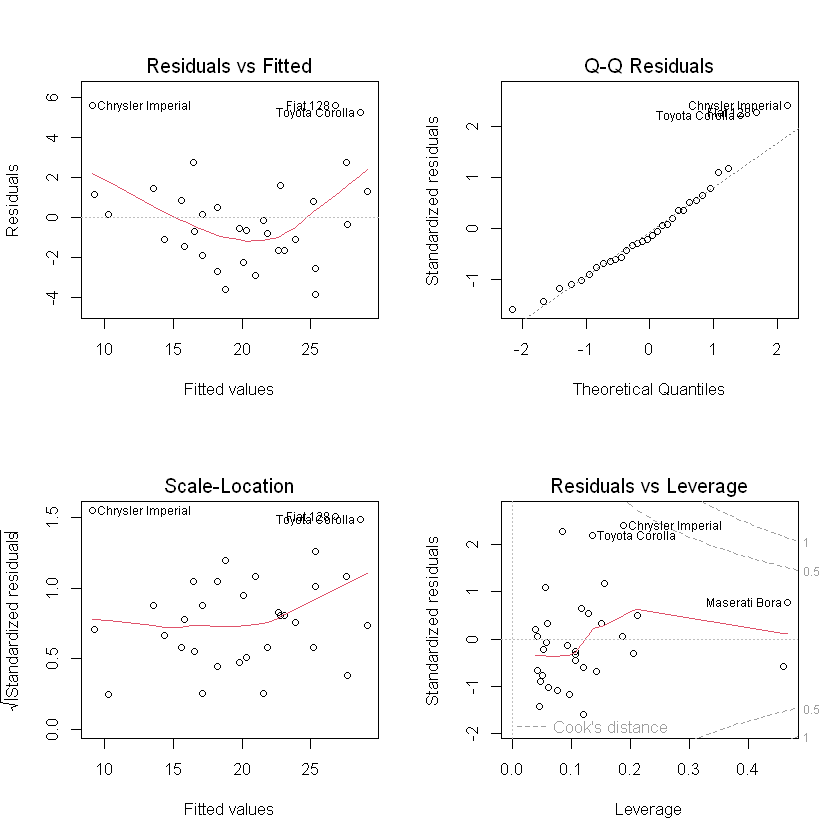

In [16]:
# tache 7:
par(mfrow = c(2, 2))
plot(model)